In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(centers=3, random_state=42)

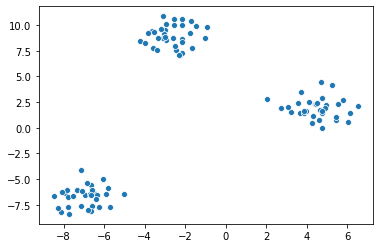

In [4]:
sns.scatterplot(X[:, 0], X[:, 1])

## Custom Implementation

In [11]:
import random

class Cluster:
    
    def __init__(self, center):
        self.center = center
        self.points = []
    
    def distance(self, point):
        return np.sqrt(np.sum((point - self.center) ** 2))
        

class CustomKMeans:
    
    def __init__(self, n_clusters=3, max_iters=20):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
    
    def fit(self, X):
        
        clusters = []
        for i in range(self.n_clusters):
            cluster = Cluster(center=random.choice(X))
            clusters.append(cluster)
        
        for i in range(self.max_iters):
            
            labels = []
            
            for point in X:

                distances = []
                for cluster in clusters:
                    distances.append(cluster.distance(point))

                closest_idx = np.argmin(distances)
                closest_cluster = clusters[closest_idx]
                closest_cluster.points.append(point)
                labels.append(closest_idx)

            for cluster in clusters:
                cluster.center = np.mean(cluster.points, axis=0)
            
        self.labels_ = labels
        self.cluster_centers_ = [cluster.center for cluster in clusters]

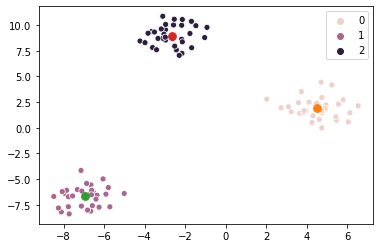

In [12]:
model = CustomKMeans(n_clusters=3)

model.fit(X)

sns.scatterplot(X[:, 0], X[:, 1], hue=model.labels_)

for center in model.cluster_centers_:
    plt.scatter(center[0], center[1], s=60)

## Sklearn Implementation

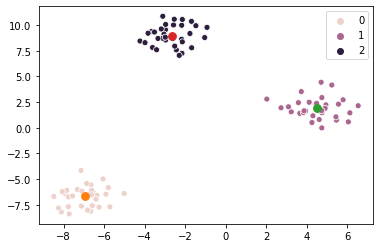

In [10]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

model.fit(X)

sns.scatterplot(X[:, 0], X[:, 1], hue=model.labels_)

for center in model.cluster_centers_:
    plt.scatter(center[0], center[1], s=60)